In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; 
import seaborn as sns
import scipy.stats as stats
import pylab 
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

In [579]:
data = pd.read_csv(r'Oslo_1729179.csv')
shape = data.shape
shape

(50000, 47)

In [580]:
data.isnull().sum()

acct_doc_header_id               0
company_id                       0
doc_number                       0
doc_number_norm                  0
business_code                    0
create_year                  50000
document_line_number         50000
document_type                    0
cust_number                      0
cust_number_norm                 0
customer_map_id                  0
name_customer                    0
division                     50000
document_create_date             0
document_create_date_norm        0
posting_date                 50000
posting_date_norm            50000
posting_id                   50000
due_in_date                  50000
due_in_date_norm             50000
order_create_date            50000
order_date_norm              50000
invoice_id                       0
invoice_id_norm                  0
baseline_create_date         39529
invoice_date_norm            39529
total_open_amount                0
total_open_amount_norm           0
cust_payment_terms  

In [581]:
data.head()

,acct_doc_header_id,company_id,doc_number,doc_number_norm,business_code,create_year,document_line_number,document_type,cust_number,cust_number_norm,...,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
0,537220339,60,36412181,36412181,seod1,NaN,NaN,RI,219010,219010,...,NaN,NaN,NaN,8044.10,537220339,8044.10,8044.10,-2,65,NaN
1,539706972,60,39604222,39604222,LERP4,NaN,NaN,RI,228446,228446,...,NaN,NaN,NaN,1124.97,539706972,1124.97,1124.97,3,63,NaN
2,533956126,60,31702339,31702339,CZRP4,NaN,NaN,RI,228442,228442,...,NaN,NaN,NaN,4827.48,533956126,4827.48,4827.48,-2,58,NaN
3,532484065,60,29796586,29796586,HYON10,NaN,NaN,RI,228140,228140,...,NaN,NaN,NaN,11109.44,532484065,11109.44,11109.44,47,107,NaN
4,542559609,60,44809576,44809576,Piat8,NaN,NaN,RI,219001,219001,...,NaN,NaN,NaN,899.99,542559609,899.99,899.99,-1,59,NaN


In [582]:
print("Total no of unique customers:- ",data.cust_number.nunique(dropna=True))
data.name_customer.unique()

Total no of unique customers:-  50


array(['see food', 'LEXCORP', 'CZERKA CORP', 'HYPERION CORPORATION',
       'PiperChat', 'Fatboy Industries', 'nucleus', 'end frame',
       'mdassist pvt ltd', 'PAGE INDUSTRIES', 'hooli xyz',
       'Weyland-Yutani corp', 'kais corp', 'skynetpwc softwares',
       'cvMaker corp', 'pied piper', 'Cyberdyne Systems Corporation',
       'ABC Softwares', 'system ops', 'wtf foods', 'chatmet', 'hooli',
       'aviato', 'bochmanedy', 'middle man inc', 'xyz softwares',
       'Primatech industries', 'ABSTERGO INDUSTRIES', 'Tyrell Corporation',
       'Pathak networks', 'UMBRELLA CORP', 'walmart', 'arp softwares',
       'codeU', 'deep scraper', 'randstad', 'sam kaiser', 'AT&T',
       'ERT companies', 'Soylent Corporation', 'medi help corporation',
       'VERIDIAN DYNAMICS', 'media tech', 'OMNI CONSUMER PRODUCTS ',
       'raviga capital', 'Veidt Industries', 'johnsons and johnsons',
       'RUPTURE FARMS', 'EVIL CORP', 'openbox corp'], dtype=object)

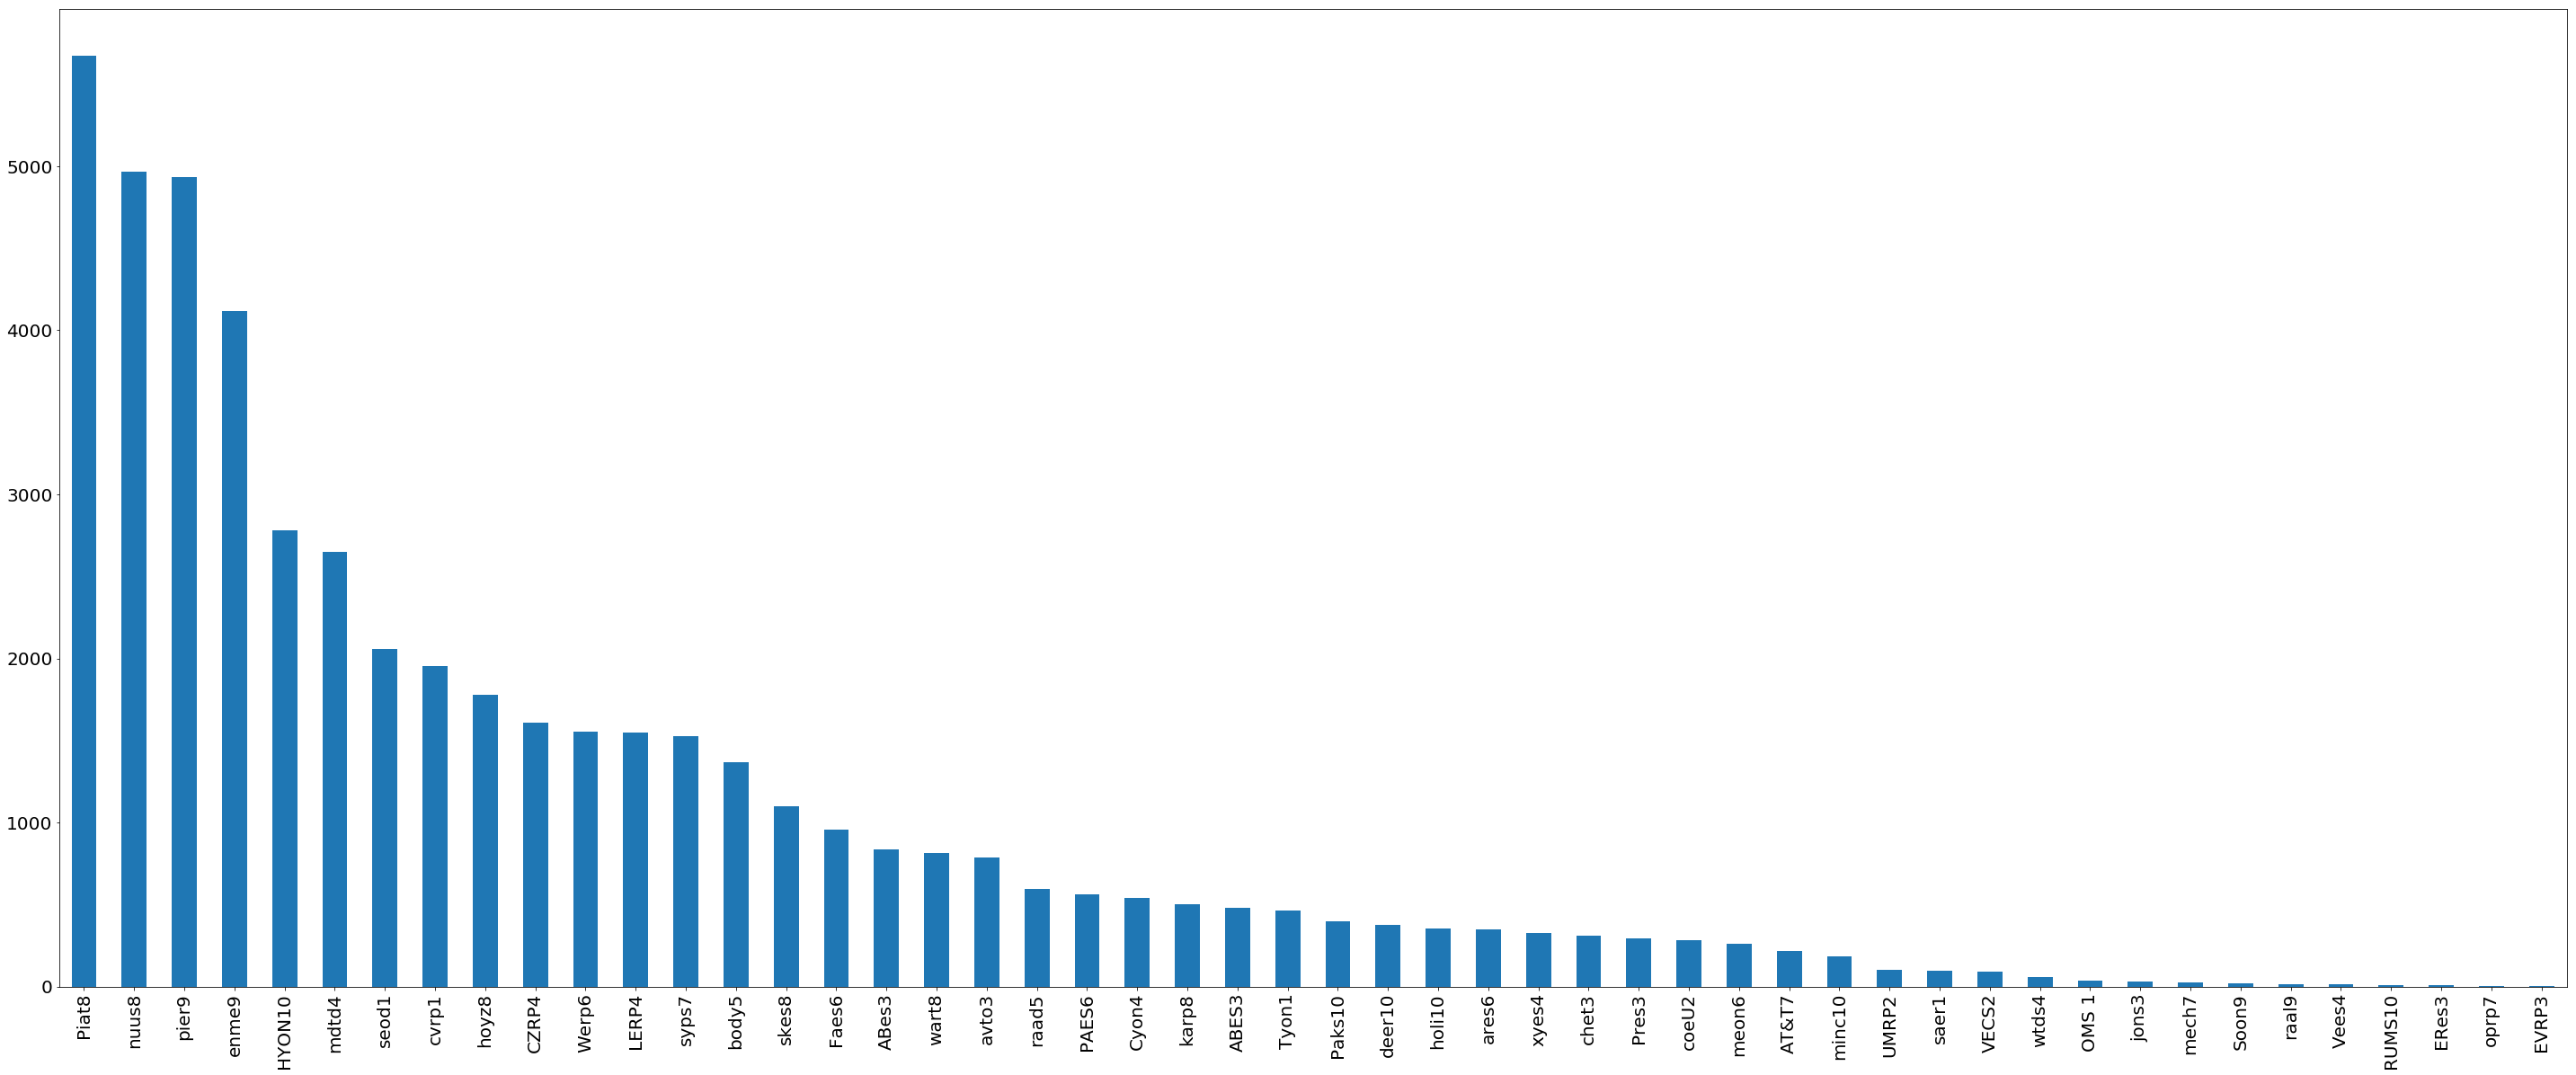

In [583]:
cod_val = data.business_code.value_counts().plot.bar(align = 'center', width = .5, figsize = (50,20), fontsize = 20 )

In [516]:
cols = ['name_customer', 'cust_number', 'document_create_date', 'actual_outstanding_amount']
cust_details = data[cols]

grouped_details = cust_details.groupby(cust_details.name_customer)

cname = []; 
amt = []; 
i = 0
for name, group in grouped_details:
    #print(name)
    #print(group.head())
    i+=1
    tot_out = group.actual_outstanding_amount.sum()
    cname.append(name); 
    amt.append(tot_out)
    
#print(i)

custDet_mod = pd.DataFrame({"customer_name": cname, "total_actual_outstanding_amount":amt})

custDet_mod

,customer_name,total_actual_outstanding_amount
0,ABC Softwares,13516774.56
1,ABSTERGO INDUSTRIES,4033177.02
2,AT&T,3009673.63
3,CZERKA CORP,9592058.90
4,Cyberdyne Systems Corporation,4299535.64
5,ERT companies,316082.09
6,EVIL CORP,12914.82
7,Fatboy Industries,9531276.09
8,HYPERION CORPORATION,22178098.00
9,LEXCORP,14750089.53


In [584]:
custDet_mod = custDet_mod.sort_values("total_actual_outstanding_amount", ascending = False)
print("Top 10 customer with highest_actual_outstanding_amount")
custDet_mod.head(10)


Top 10 customer with highest_actual_outstanding_amount


,customer_name,total_actual_outstanding_amount
40,pied piper,45509589.14
29,end frame,43398477.72
13,PiperChat,40522229.30
38,nucleus,34239345.27
8,HYPERION CORPORATION,22178098.00
34,mdassist pvt ltd,19707542.99
44,see food,16848453.25
24,bochmanedy,16188065.35
27,cvMaker corp,15400883.36
9,LEXCORP,14750089.53


## Changing datatype to datetime

No. of transactions year-wise


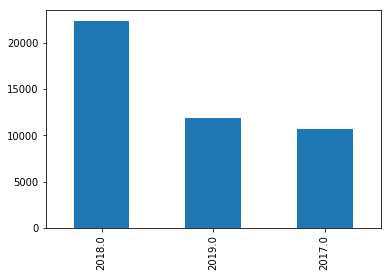

In [585]:

date_cols = [cols for cols in data.columns if "date" in cols]
data[date_cols].dtypes

#data type changed
for col in date_cols:
    data[col] = pd.to_datetime(data[col])

print("No. of transactions year-wise")
pltt = data['clear_date_norm'].dt.year.value_counts().plot.bar()

## PLOTTING of actual_outstanding_amount & payment amount to get the relationship between two

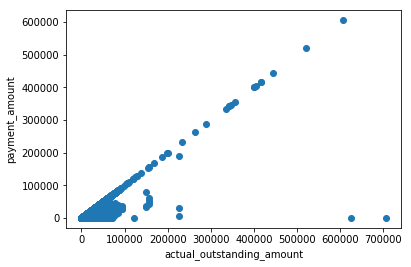

In [588]:
plt.scatter(data['actual_outstanding_amount'], data['payment_amount'])
plt.xlabel('actual_outstanding_amount')
plt.ylabel('payment_amount')

## sorting the data by clear_date_norm

In [519]:
data.sort_values(by=["clear_date_norm"], inplace = True)
data.tail()    

,acct_doc_header_id,company_id,doc_number,doc_number_norm,business_code,create_year,document_line_number,document_type,cust_number,cust_number_norm,...,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
48611,545714434,60,51199813,51199813,nuus8,NaN,NaN,RI,218997,218997,...,NaN,NaN,NaT,18080.95,545714434,18080.95,0.0,1969-12-31 23:59:59.999999955,15,NaN
48612,545755849,60,51234705,51234705,seod1,NaN,NaN,RI,219010,219010,...,NaN,NaN,NaT,582.71,545755849,582.71,0.0,1969-12-31 23:59:59.999999947,14,NaN
48613,544763361,60,49835984,49835984,nuus8,NaN,NaN,RI,218997,218997,...,NaN,NaN,NaT,2271.60,544763361,2271.60,0.0,1970-01-01 00:00:00.000000002,62,NaN
48614,545026409,60,50391676,50391676,Piat8,NaN,NaN,RI,219001,219001,...,NaN,NaN,NaT,699.98,545026409,699.98,0.0,1969-12-31 23:59:59.999999983,43,NaN
48615,545898760,60,51505726,51505726,pier9,NaN,NaN,RI,218994,218994,...,NaN,NaN,NaT,6402.34,545898760,6402.34,0.0,1969-12-31 23:59:59.999999945,5,NaN


## Final test data and train data split


In [520]:
data.shape
finaltest_data = data.iloc[45000:, :]
data = data.iloc[:45000, :]
finaltest_data.shape, data.shape, data.clear_date_norm.isnull().sum()

((5000, 47), (45000, 47), 0)

# Preprocessing...

## Removing Null columns

In [521]:
null_cols = [cols for cols in data.columns if data[cols].isnull().sum()==data.shape[0]]
print(null_cols)

print(f"data.shape earlier = {data.shape}")
data.dropna(axis = 1, how = 'all', inplace = True)
print(f"data.shape after = {data.shape}")

['create_year', 'document_line_number', 'division', 'posting_date', 'posting_date_norm', 'posting_id', 'due_in_date', 'due_in_date_norm', 'order_create_date', 'order_date_norm', 'area_business', 'shipping_to', 'reason_code', 'discount_due_date_norm', 'debit_credit_status', 'payment_method', 'document_create_date.1', 'dispute_amount']
data.shape earlier = (45000, 47)
data.shape after = (45000, 29)


In [522]:
uniqueEquals1 = [cols for cols in data.columns if data[cols].nunique() == 1]
print(uniqueEquals1)
data.drop(uniqueEquals1, axis = 1, inplace = True)
data.shape

['company_id', 'document_type', 'customer_map_id', 'total_open_amount', 'total_open_amount_norm', 'is_open_invoice']


(45000, 23)

## Remove Duplicate cols

In [523]:
def getDuplicateColumns(data: pd.DataFrame):    
    duplicateColumnNames = list()
    correspondingColumnsNames = list()
    # Iterate over all the columns in dataframe
    for x in range(data.shape[1]):
        # Select column at xth index.
        col = data.iloc[:, x]
        for y in range(x + 1, data.shape[1]):# Select column at yth index.
            otherCol = data.iloc[:, y]# Check if two columns at x and y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.append(data.columns.values[y])
                correspondingColumnsNames.append(data.columns.values[x])

    return duplicateColumnNames,  correspondingColumnsNames

In [524]:
corrCol, dupCol = getDuplicateColumns(data)
for i, (x, y) in enumerate(zip(corrCol, dupCol )):
    print(f"{x}---->{y}")

doc_id---->acct_doc_header_id
doc_number_norm---->doc_number
invoice_id---->doc_number
invoice_id_norm---->doc_number
invoice_id---->doc_number_norm
invoice_id_norm---->doc_number_norm
cust_number_norm---->cust_number
document_create_date_norm---->document_create_date
invoice_id_norm---->invoice_id
invoice_date_norm---->baseline_create_date
clear_date_norm---->clear_date
actual_outstanding_amount---->invoice_currency


In [525]:
data.drop(labels = dupCol, axis = 1, inplace = True)
data.shape, data.columns

((45000, 14), Index(['business_code', 'cust_number_norm', 'name_customer',
        'document_create_date_norm', 'invoice_id_norm', 'invoice_date_norm',
        'cust_payment_terms', 'shipping_date', 'clear_date_norm', 'doc_id',
        'actual_outstanding_amount', 'payment_amount', 'days_past_duedate',
        'age_invoice'],
       dtype='object'))

In [526]:
((data.clear_date_norm.isnull()) & (data.payment_amount == 0)).sum(), data.clear_date_norm.isnull().sum(), (data.payment_amount == 0).sum()

(0, 0, 332)

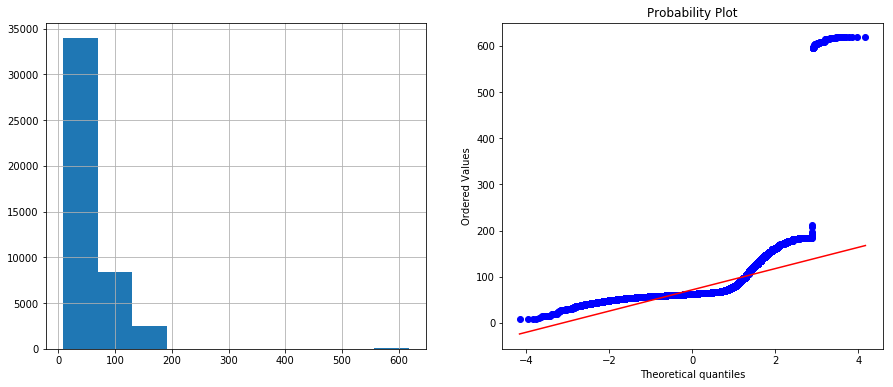

In [527]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=pylab)

    plt.show()
    

diagnostic_plots(data,"age_invoice")

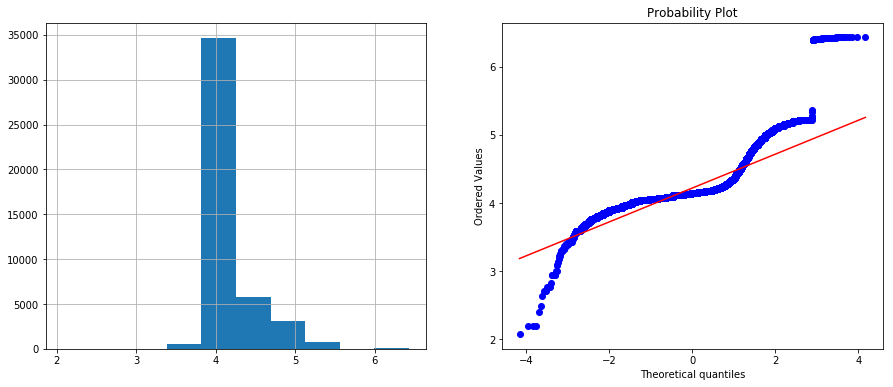

In [528]:
data['Age_log'] = np.log(data.age_invoice)

diagnostic_plots(data, 'Age_log')

## Label Encoding

In [529]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.name_customer.unique())
data.name_customer = le.transform(data.name_customer)

In [530]:
[col for col in data.columns if data[col].isnull().sum()>0]

['invoice_date_norm', 'shipping_date']

## Considering the document which appears first and drop the rest duplicate document numbers

In [531]:
data.columns

Index(['business_code', 'cust_number_norm', 'name_customer',
       'document_create_date_norm', 'invoice_id_norm', 'invoice_date_norm',
       'cust_payment_terms', 'shipping_date', 'clear_date_norm', 'doc_id',
       'actual_outstanding_amount', 'payment_amount', 'days_past_duedate',
       'age_invoice', 'Age_log'],
      dtype='object')

In [532]:
## since invoice_id_norm is duplicate of doc_number we can use invoice_id_norm
print(data.shape)
data.drop_duplicates(subset = "invoice_id_norm", inplace= True)
#y_train = y_train[ind]
data.shape

(45000, 15)


(40850, 15)

## Test-Train Split

In [533]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float32', 'float64']
numerical_vars = data.select_dtypes(include=numerics).columns
len(numerical_vars)
data = data[numerical_vars]
data.shape
[col for col in data.columns if data[col].isnull().sum()>0]
# removing the rows where the payment_amount == 0
data = data[data.payment_amount!=0]
#checking for null columns
[col for col in data.columns if data[col].isnull().sum()>0]

[]

In [534]:
data.shape

(40536, 9)

In [535]:
len(data.columns)

9

In [536]:
train, test = train_test_split(data, test_size=0.3, random_state=0, shuffle= False)

print(f"train.col = {X_train.columns}")
print(f"test.col = {X_test.columns}")

train.shape, test.shape

train.col = Index(['invoice_id_norm', 'actual_outstanding_amount', 'age_invoice_x',
       'age_invoice_y', 'actual_outstanding_amount_average'],
      dtype='object')
test.col = Index(['cust_number_norm', 'name_customer', 'invoice_id_norm',
       'cust_payment_terms', 'doc_id', 'actual_outstanding_amount',
       'age_invoice', 'Age_log'],
      dtype='object')


((28375, 9), (12161, 9))

In [537]:
X_val, X_test, y_val, y_test = train_test_split(
   test.drop(labels=['payment_amount'], axis=1), test['payment_amount'],
    test_size = 0.5, random_state = 0)

In [538]:
X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6080, 8), (6080,), (6081, 8), (6081,))

In [539]:
X_train.columns

Index(['invoice_id_norm', 'actual_outstanding_amount', 'age_invoice_x',
       'age_invoice_y', 'actual_outstanding_amount_average'],
      dtype='object')

In [540]:
y_train = train["payment_amount"]
X_train = train.drop(["payment_amount"], axis = 1)
X_train.shape, y_train.shape

((28375, 8), (28375,))

## Mean Encoding

In [541]:
lookup = X_train.groupby(['name_customer'])['age_invoice'].apply(lambda x:x.mean()).reset_index()

In [542]:
lookup.head()

,name_customer,age_invoice
0,0,64.021654
1,1,67.180851
2,2,66.023810
3,3,71.004440
4,4,68.969444


In [543]:
X_train = X_train.merge(lookup, on = "name_customer", how = "left")
X_test  = X_test.merge(lookup , on= "name_customer", how = "left")
X_val = X_val.merge(lookup, on = "name_customer", how = "left")
X_train.shape, X_test.shape, X_val.shape, X_train.columns

((28375, 9),
 (6081, 9),
 (6080, 9),
 Index(['cust_number_norm', 'name_customer', 'invoice_id_norm',
        'cust_payment_terms', 'doc_id', 'actual_outstanding_amount',
        'age_invoice_x', 'Age_log', 'age_invoice_y'],
       dtype='object'))

In [544]:
lookup2 = X_train.groupby(['name_customer'])['actual_outstanding_amount'].apply(lambda x:x.mean()).reset_index()
lookup2.head()

,name_customer,actual_outstanding_amount
0,0,15184.606378
1,1,8222.427633
2,2,13811.526190
3,3,6216.479423
4,4,7757.935250


In [545]:
lookup2.shape

(50, 2)

In [546]:
X_train = X_train.merge(lookup2, on = "name_customer", how = "left", suffixes=('', '_average'))
X_test  = X_test.merge(lookup2 , on= "name_customer", how = "left", suffixes=('', '_average'))
X_val = X_val.merge(lookup2, on = "name_customer", how = "left", suffixes=('', '_average'))
X_train.shape, X_test.shape, X_val.shape, X_train.columns

((28375, 10),
 (6081, 10),
 (6080, 10),
 Index(['cust_number_norm', 'name_customer', 'invoice_id_norm',
        'cust_payment_terms', 'doc_id', 'actual_outstanding_amount',
        'age_invoice_x', 'Age_log', 'age_invoice_y',
        'actual_outstanding_amount_average'],
       dtype='object'))

In [547]:
group = X_train.groupby(['name_customer'])['actual_outstanding_amount_average']

X_train.head()

,cust_number_norm,name_customer,invoice_id_norm,cust_payment_terms,doc_id,actual_outstanding_amount,age_invoice_x,Age_log,age_invoice_y,actual_outstanding_amount_average
0,228111,32,28367138,60,531532864,14007.62,173,5.153292,158.400000,18032.814000
1,218995,30,28333014,60,531518559,5126.54,149,5.003946,70.847682,8691.946126
2,218995,30,28332741,60,531517926,4275.72,149,5.003946,70.847682,8691.946126
3,228453,37,28332622,60,531518219,19770.56,149,5.003946,50.215054,16659.666882
4,218995,30,28332862,60,531518058,6831.62,149,5.003946,70.847682,8691.946126


## Considering the document which appears first and drop the rest duplicate document numbers

In [548]:
"""
print(X_train.shape)
X_train.drop_duplicates(subset = "doc_id", inplace= True)
#y_train = y_train[ind]
X_train.shape
"""

'\nprint(X_train.shape)\nX_train.drop_duplicates(subset = "doc_id", inplace= True)\n#y_train = y_train[ind]\nX_train.shape\n'

In [549]:
# checkin null and zero value in y label
(y_val==0).sum(), (y_test==0).sum(), y_test.isnull().sum(), y_val.isnull().sum()

(0, 0, 0, 0)

In [550]:
X_test.shape, y_test.shape, X_val.shape, y_val.shape

((6081, 10), (6081,), (6080, 10), (6080,))

## Removing Quasi-Constants

In [551]:
sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [552]:
sum(sel.get_support())
non_const = X_train.columns[sel.get_support()]
len(non_const)


10

In [553]:
q_constant_col = [col for col in X_train.columns if col not in non_const]
q_constant_col
print(f"Quasi-const var count = {len(q_constant_col)}")

Quasi-const var count = 0


## Correlattion Matrix

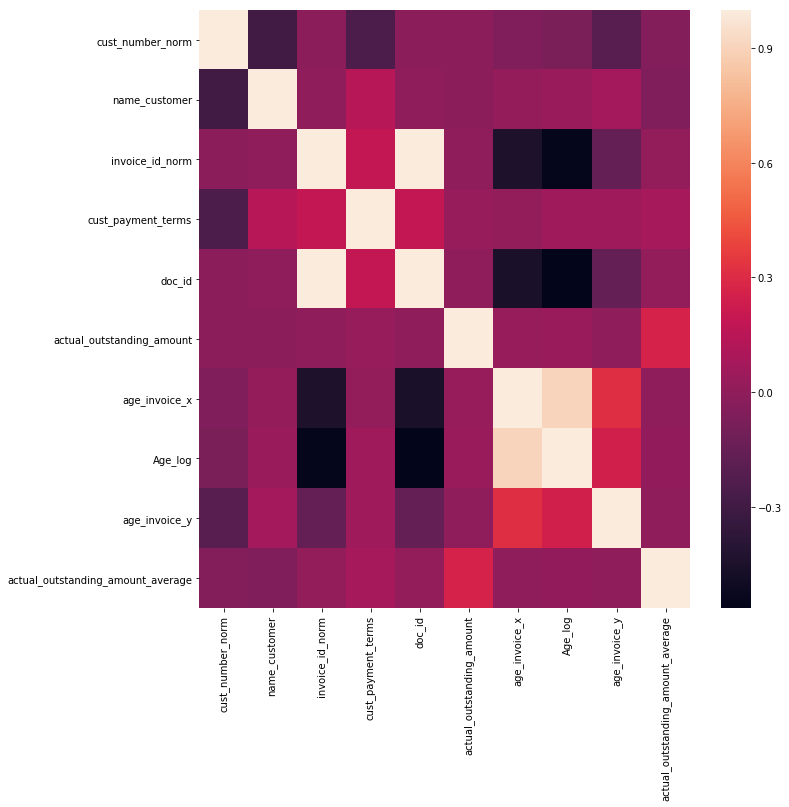

In [554]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [555]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.6)
len(set(corr_features)), corr_features

(2, {'Age_log', 'doc_id'})

In [556]:
X_train.drop(corr_features,axis = 1,  inplace = True)
X_test.drop(corr_features, axis = 1,  inplace = True)
X_val.drop(corr_features, axis = 1,  inplace = True)

In [557]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((28375, 8), (6081, 8), (6080, 8), (28375,), (6081,), (6080,))

## Training Over Model

In [558]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=4)#cls = RandomForestRegressor(n_estimators=150)

cls.fit(X_train, y_train)#We are training the model with RBF'ed data

scoreOfModel = cls.score(X_train, y_train)

#to check overfitting.. 
print("Score on train set is calculated as: ",scoreOfModel)


Score on train set is calculated as:  0.962738094375


In [559]:
scoreOfModelonVal = cls.score(X_val, y_val)
print(f"Score on val set is calculated as: {scoreOfModelonVal}")#"#Test}")

Score on val set is calculated as: 0.9465132158943189


## Model tuning..

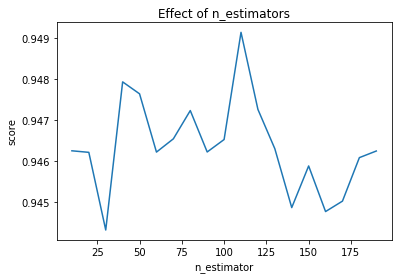

In [560]:
estimators = np.arange(10, 200, 10)
bestEstimator =100
bestScore = scoreOfModelonVal
scores = []

for n in estimators:
    cls.set_params(n_estimators=n)
    cls.fit(X_train, y_train)
    score = cls.score(X_val, y_val)
    
    if score > bestScore:
        bestScore = score
        bestEstimator = n
    scores.append(score)
    
    
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")

plt.ylabel("score")
plt.plot(estimators, scores)



In [561]:
print(f"bestScore = {bestScore} at estimator = {bestEstimator}")

bestScore = 0.9491336183284526 at estimator = 110


In [562]:
cls.fit(X_train, y_train)
cls.set_params(n_estimators = bestEstimator)
scoreOfModelonTest = cls.score(X_test, y_test)


In [563]:
print(f"scoreOfModel ON test set = {scoreOfModelonTest}")
pred = cls.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred,'difference':(y_test-pred)})
#absolute errors
errors = abs(pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


scoreOfModel ON test set = 0.9192249597755607
Mean Absolute Error: 910.22 degrees.


In [564]:
df

,Actual,Predicted,difference
24765,331.46,871.721342,-540.261342
30587,5122.97,4495.421826,627.548174
19172,1440.30,1368.746168,71.553832
33309,20518.72,17465.227641,3053.492359
16842,1922.06,1368.746168,553.313832
14438,1499.98,1368.746168,131.233832
30574,20953.59,17504.815308,3448.774692
36348,8123.47,7447.942992,675.527008
18905,7941.43,7345.182850,596.247150
38387,5737.30,5084.490728,652.809272


## Feature Selection (Random Forest Recursive Feature Selection) Selecting top 5 features

In [566]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

sel_ = RFE(RandomForestRegressor(n_estimators=100), n_features_to_select=5)
sel_.fit(X_train, y_train)
sel_.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [567]:
# this command let me visualise those features that were selected.
sel_.get_support()
# let's add the variable names and order it for clearer visualisation
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat), selected_feat

(5, Index(['invoice_id_norm', 'actual_outstanding_amount', 'age_invoice_x',
        'age_invoice_y', 'actual_outstanding_amount_average'],
       dtype='object'))

In [568]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]
X_val = X_val[selected_feat]

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((28375, 5), (6081, 5), (6080, 5), (28375,), (6081,), (6080,))

## Training..

In [569]:
cls.get_params ## checking params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [570]:
#from sklearn.ensemble import RandomForestRegressor
#cls = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=4)#cls = RandomForestRegressor(n_estimators=150)

cls.fit(X_train, y_train)#We are training the model with RBF'ed data

scoreOfModel = cls.score(X_train, y_train)

#to check overfitting.. 
print("Score on train set is calculated as: ",scoreOfModel)


Score on train set is calculated as:  0.961903982335


In [571]:
scoreOfModelonVal = cls.score(X_val, y_val)
print(f"Score on val set is calculated as: {scoreOfModelonTest}")

Score on val set is calculated as: 0.9192249597755607


In [572]:
print(f"scoreOfModel ON test set = {scoreOfModelonTest}")
pred = cls.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred,'difference':(y_test-pred)})
#absolute errors
errors = abs(pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


scoreOfModel ON test set = 0.9192249597755607
Mean Absolute Error: 920.61 degrees.


In [573]:
df

,Actual,Predicted,difference
24765,331.46,893.542194,-562.082194
30587,5122.97,4445.251257,677.718743
19172,1440.30,1335.486134,104.813866
33309,20518.72,17464.661867,3054.058133
16842,1922.06,1335.486134,586.573866
14438,1499.98,1335.486134,164.493866
30574,20953.59,17464.661867,3488.928133
36348,8123.47,7393.948776,729.521224
18905,7941.43,7323.914214,617.515786
38387,5737.30,5164.193263,573.106737


## After removing Out_standing_amount

In [574]:
X_train.columns, len(X_train.columns)

(Index(['invoice_id_norm', 'actual_outstanding_amount', 'age_invoice_x',
        'age_invoice_y', 'actual_outstanding_amount_average'],
       dtype='object'), 5)

In [575]:
X_train_ = X_train.drop('actual_outstanding_amount', axis = 1)
X_test_ = X_test.drop('actual_outstanding_amount', axis = 1)
X_val = X_val.drop('actual_outstanding_amount', axis = 1)

In [576]:
cls = RandomForestRegressor(n_estimators= bestEstimator, criterion='mse', max_depth=4)

cls.fit(X_train, y_train)#We are training the model with RBF'ed data

scoreOfModel = cls.score(X_train, y_train)

#to check overfitting.. 
print("Score on train set is calculated as: ",scoreOfModel)



Score on train set is calculated as:  0.962363911807


In [577]:
print(f"scoreOfModel ON test set = {scoreOfModelonTest}")
pred = cls.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred,'difference':(y_test-pred)})
#absolute errors
errors = abs(pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


scoreOfModel ON test set = 0.9192249597755607
Mean Absolute Error: 906.33 degrees.
